# Guitar Sustain Data Analysis
This is an analysis of the data that Jim Lill recorded and used as part of his [video on guitar sustain](https://youtu.be/muVzwbkUUnM) and made available on his [website](https://jimlillmusic.com/sustain/) in pdf and xlsx formats. He also provided details on the recording process.

We will examine his data and see if we can identify any major trends left unidentified, though I imagine we'll come to the same conclusions that Jim did in his video.

In [1]:
import pandas as pd
from os.path import exists
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = 'Jims-sustain-test-list-and-numbers.xlsx'

if not exists(file): # Download the file if it isn't already in the notebook's directory
    r = requests.get('https://jimlillmusic.com/wp-content/uploads/2022/01/Jims-sustain-test-list-and-numbers.xlsx')
    with open(file, 'wb') as f:
        f.write(r.content)

# Create data frame        
df = pd.read_excel(file, index_col=0, header=1)
df.head(10)

,strum peak,strum 4s,strum 4s diff,low E peak,low E 4s,low E diff,high E peak,high E 4s,high E diff,strum dist lo pk,...,0sec,4sec,diff,Unnamed: 33,Unnamed: 34,strum sec to death,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
Tele DI,-22.4,-34.1,11.7,-22.9,-36.9,14.0,-30.8,-54.8,24.0,-7.8,...,-12.722222,-21.611111,8.888889,avg of all 4,NaN,45.0,NaN,NaN,NaN,NaN
SG DI,-10.0,-22.8,12.8,-13.9,-30.4,16.5,-16.1,-37.9,21.8,-7.5,...,-8.588889,-15.344444,6.755556,9.341667,NaN,54.0,NaN,NaN,NaN,NaN
Gretsch DI,-26.7,-37.6,10.9,-28.6,-41.9,13.3,-32.9,-63.2,30.3,-9.1,...,-14.588889,-25.333333,10.744444,NaN,NaN,37.0,NaN,NaN,NaN,NaN
Strat DI,-23.2,-38.6,15.4,-26.1,-40.6,14.5,-26.3,-60.1,33.8,-8.8,...,-13.011111,-23.988889,10.977778,NaN,NaN,48.0,NaN,NaN,NaN,NaN
Tele close miked,-29.3,-47.3,18.0,-35.2,-43.9,8.7,-29.6,-53.8,24.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
SG close miked,-21.9,-43.8,21.9,-34.2,-51.2,17.0,-23.8,-53.2,29.4,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
Gretsch close miked,-18.0,-37.5,19.5,-27.7,-42.4,14.7,-24.8,-36.1,11.3,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN
Strat close miked,-18.7,-27.3,8.6,-29.4,-48.3,18.9,-23.3,-51.6,28.3,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
NaN,NaN,^dblcheck value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations

There are some rows and columns without data to offer visual space (and one row even contains the comment 'dblcheck value' accompanied by a caret being used to point to the fields above). As part of the cleaning process, we'll:
* remove these columns and rows full of NaN values, 
* rename the columns and rows and define them in a markdown cell, and
* discern what data we need for our analysis and what data we can abandon.

As he points out on his website, some of the data entries seem a bit wonky, and indeed we need to come up with a way to control for variances in Tim's playing for the data recording or other unseen factors, so for this analysis, we'll reinterpret his data in more useful terms by using math to model how a string should be decaying between the starting and stopping points in his dataset. I'm personally unfamiliar with this, so below is a list of resources for determining how to model a string for our purposes.

## String Modeling Resources
* [What is the (approximate) function for amplitude of a plucked string over time? Does it differ between string types?](https://dsp.stackexchange.com/questions/54176/what-is-the-approximate-function-for-amplitude-of-a-plucked-string-over-time) from the Signal Processing Stack Exchange

# What We're Getting Rid Of
We don't need anything past the `High E hi dist diff` column, and nothing past the `Strat strum finger` row since they are just averages and differences that we can easily calculate if needed. For that matter, we don't want any other rows or columns that record averages or differences. Obviously, we'll make sure to get rid of any stray empty rows and columns left in the dataset for visual spacing.

# What We're Keeping
We want the raw recorded dB levels at 0 and 4 seconds. The original dataset tries to measure sustain, but accidentally-high peaks at the start of the sound clips might skew the numbers without indicating meaningful sustain. We should probably define what meaningful sustain is.
## Defining Sustain
In the context of guitar sustain, sustain is a note played on guitar with high enough perceived volume to be audible and present in a produced performance of music.
## What We're Doing With The Data We're Keeping
While it would be better to have the original sound files and simply measure [LUFS](https://www.sweetwater.com/insync/what-is-lufs-and-why-should-i-care/) for the first 4 seconds, we don't have that data. What we can do is convert the dB values to an amplitude value between 0 and 1 and interpolate between the two points using a simple exponential decay model: $ x(t) = a * exp(−bt) $—aka $ x(t) = a \times e^{-bt} $. After that, we'll calculate the LUFS of the sound for the given 4 seconds to quantify sustain. This will help minimize the impact of any wonky too-high peaks or any other abnormalities in the sound. Then we'll look for trends.

For reference, here is what our mathematical function might look like representing the amplitude of our guitar string over time.

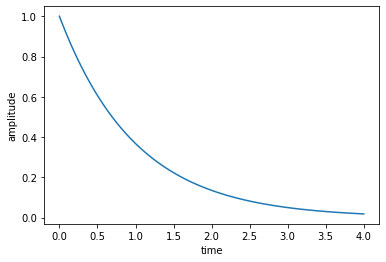

In [2]:
x = np.linspace(0, 4, num=100)
y = np.exp(-x)

plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(x, y)

plt.show()

Note that our time will be in seconds, but the amplitude will be in a scalable range between 0 and 1. I really don't know what units to use for the amplitude besides just a generic length "unit"—meters maybe? I'm not sure it matters. My approach with only using negative decibel numbers leads to a scalable unit that could be changed with a volume knob for instance... which I just realized is probably why digital audio workstations work within the gamut of negative decibel values. huh.

## Further Possible Data Interpretation
If one were to decide that the 4 second period was too arbitrary or simply wrong, the method I'll use should allow one to extrapolate Tim's data to other periods of time. For this analysis, we'll stick with Tim's intuition on measuring a 4 second period. One potential issue with my approach may be that, not knowing what the measured audio files looked like and given Tim's description of his data-gathering technique, it's possible that Tim's peak dB method doesn't necessarily place the recorded dB level at $ t = 0 $, since the first peak is somewhere within the first 4 seconds possibly with varying consistency, meaning that I will interpolate as if on a 4-second interval when I instead should be using some other interval given my data points; I considered and came to the conclusion that the peak was probably close enough to $ t = 0 $ that it didn't matter for our purposes.

One could also use a different formula for modeling string amplitude over time. If you are interested in different mathematical models and the physics of strings, there are very interesting depths to plumb in the resources I have linked to earlier in this notebook. They can be a great starting point to learn the keywords for searching for this stuff on the internet, because, for this topic, it is very easy to get lost in search results about how long strings last before you should replace them and other un-mathy things. This might be important since the dataset has data for strums at the neck and at the bridge, which will change the harmonic content and might make a big enough difference to warrant a model that accounts for a more holistic modeling of a string.

Better than LUFS might be calculating a constant $ b $ that represents how much the sound dies off, but there is likely too much noise in the data to accurately calculate that, and there might be no way to calculate $ b $ given the dataset anyway for all I know since $ a $ is also an unquantified factor.

It occurs to me that amplitude is changing exponentially in this situation and decibels represent amplitude on an exponential scale. It's possible that, since I already have decibel values, the actual approach I should be taking is a linear interpolation. If I left this paragraph here, I apparently found it easier to convert to amplitude, interpolate, and from there convert to LUFS, and I found it more difficult to thoroughly understand the mathematics of decibels, interpolate between decibel values, and then convert to LUFS.

Another potential issue is that there might be a big difference between modeling full strums of the guitar vs single string plucks, which the dataset has data to differentiate between. My musician's intuition is that the way everything adds together is roughly as accurate with my simple model regardless of how many strings are contributing to the total amplitude, and I'm not sure how to figure out if there is a significant difference either way.

I'd love to hear more from people with opinions, knowledge, and wisdom regarding these or any other related concerns.

# Data Cleaning

In [3]:
# Display indexes and column names
print(df.index, '\n'*2, df.columns)

Index([             'Tele DI',                'SG DI',           'Gretsch DI',
                   'Strat DI',     'Tele close miked',       'SG close miked',
        'Gretsch close miked',    'Strat close miked',                    nan,
                          nan,      'Tele strum hard',        'SG strum hard',
         'Gretsch strum hard',     'Strat strum hard',                    nan,
            'Tele strum soft',        'SG strum soft',   'Gretsch strum soft',
           'Strat strum soft',                    nan,    'Tele strum bridge',
            'SG strum bridge', 'Gretsch strum bridge',   'Strat strum bridge',
                          nan,      'Tele strum neck',        'SG strum neck',
         'Gretsch strum neck',     'Strat strum neck',                    nan,
          'Tele strum finger',      'SG strum finger', 'Gretsch strum finger',
         'Strat strum finger',                    nan,                  'Avg',
                          nan,             'Tele avg

In [4]:
# Drop columns that are all NaN
df.dropna(axis=1, how='all')

# Start new variable that we will filter
raw_columns = list(df.columns)

# Cutoff columns after the last column name that we want
cutoff = raw_columns.index('High E dist hi 4sec') + 1
raw_columns = raw_columns[:cutoff]

# Filter out columns that calculate a difference
raw_columns = (col for col in raw_columns if 'diff' not in col)

df = df[raw_columns]

df.columns

Index(['strum peak', 'strum 4s', 'low E peak', 'low E 4s', 'high E peak',
       'high E 4s', 'strum dist lo pk', 'strum dist lo 4sec',
       'Low E dist lo peak', 'Low E dist lo 4s', 'High E dist lo peak',
       'High E dist lo 4sec', 'strum dist hi pk', 'strum dist hi 4sec',
       'Low E dist hi peak', 'Low E dist hi 4s', 'High E dist hi peak',
       'High E dist hi 4sec'],
      dtype='object')

In [26]:
##### I AM HAVING TROUBLE WITH THESE ROWS NAMED NAN
# There is that one row with a comment in it, so we won't use dropna in pandas
# The indexing is regular enough that we can drop any rows named 'nan' or that contain 'avg' or 'Avg'
df.index = df.index.str.lower()
raw_index = list(df.index)
raw_index = [row for row in raw_index if 'avg' not in row]

KeyError: "['nan'] not found in axis"